<a href="https://colab.research.google.com/github/Victor884/Instagram-Post-Performance-Analytics/blob/main/EDA_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
# Importa as bibliotecas necessárias para análise de dados e visualização.
# numpy para operações numéricas, pandas para manipulação de dados.
import numpy as np
import pandas as pd

# Importa matplotlib para gráficos, definindo o backend 'Agg' para ambientes sem interface gráfica
# e a exibição inline dos gráficos no notebook.
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

# Importa plotly para gráficos interativos, configurando o template padrão para 'plotly_white'.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

# Importa WordCloud para criar nuvens de palavras.
from wordcloud import WordCloud

# Importa warnings e configura para ignorar avisos, o que pode ser útil em análises exploratórias.
import warnings
warnings.filterwarnings('ignore')

In [104]:
# Carrega o arquivo CSV 'Instagram data.csv' em um DataFrame pandas.
# A codificação 'latin-1' é especificada para lidar com possíveis caracteres especiais no arquivo.
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/Instagram data.csv", encoding='latin-1')

In [105]:
# Exibe as primeiras 5 linhas do DataFrame 'data' para uma visão geral dos dados.
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [106]:
# Exibe os nomes das colunas presentes no DataFrame 'data'.
print(data.columns)

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')


In [107]:
# Exibe informações resumidas sobre o DataFrame 'data', incluindo o tipo de dado de cada coluna
# e a contagem de valores não nulos.
print(data.info)

<bound method DataFrame.info of      Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shar

In [108]:
# Verifica a contagem de valores nulos (ausentes) em cada coluna do DataFrame.
print(data.isnull().sum())

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


In [109]:
# Gera estatísticas descritivas do DataFrame 'data', como média, desvio padrão, mínimo, máximo, etc.
print(data.describe())

        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.08

In [110]:
# Cria um histograma da coluna 'Impressions' usando plotly.express.
# O número de caixas (bins) é definido como 10.
fig = px.histogram(data, x="Impressions", nbins=10,title="Distribution of Impressions")

# Atualiza os traços do gráfico para exibir os valores 'y' (contagem) como texto fora das barras.
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Remove os rótulos do eixo Y para uma visualização mais limpa, já que os valores são exibidos como texto.
fig.update_yaxes(showticklabels = False)

# Define o título do eixo Y como 'Count'.
fig.update_layout(yaxis_title_text='Count')

# Exibe o gráfico.
fig.show()

In [111]:
# Cria uma figura Plotly vazia.
fig = go.Figure()

# Adiciona um traço de dispersão (Scatter) para a coluna 'Impressions'.
# 'mode='lines+markers'' exibe tanto linhas quanto marcadores nos pontos de dados.
# 'fill='tozeroy'' preenche a área abaixo da linha até o eixo Y.
# 'marker=dict(size=2)' define o tamanho dos marcadores.
fig.add_trace(go.Scatter(
    y=data['Impressions'],
    mode='lines+markers',
    fill='tozeroy',
    marker=dict(size=2),
    name='Impressions'
))

# Atualiza o layout do gráfico com título e rótulos para os eixos X e Y.
fig.update_layout(
    title='Impressions Over Time',
    xaxis_title='Index',
    yaxis_title='Impressions'
)

# Exibe o gráfico.
fig.show()

In [112]:
# Cria uma figura Plotly vazia.
fig = go.Figure()

# Adiciona traços de dispersão para as colunas 'Likes', 'Comments' e 'Follows' ao longo do índice do DataFrame.
fig.add_trace(go.Scatter(x=data.index, y=data['Likes'], name='Likes'))
fig.add_trace(go.Scatter(x=data.index, y=data['Comments'], name='Comments'))
fig.add_trace(go.Scatter(x=data.index, y=data['Follows'], name='Follows'))

# Atualiza o layout do gráfico com título, rótulos dos eixos e configurações da legenda.
fig.update_layout(
    title='Metrics Over Time',
    xaxis_title='Index',
    yaxis_title='Count',
    legend=dict(
        orientation='h', # Legenda horizontal
        yanchor='bottom', # Ancorada na parte inferior
        y=1.02, # Posição Y da legenda (acima do gráfico)
        xanchor='center', # Ancorada no centro do X
        x=0.5 # Posição X da legenda (centro)
    )
)
# Exibe o gráfico.
fig.show()

In [113]:
# Definindo as fontes de alcance (From Home, From Hashtags, From Explore, From Other) e suas contagens totais.
reach_sources = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
reach_counts = [data[source].sum() for source in reach_sources]

# Definindo uma paleta de cores para o gráfico.
colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9']

# Criando um gráfico de rosca (donut chart) com plotly.express para visualizar o alcance de diferentes fontes.
fig = px.pie(
    data_frame=data,
    names=reach_sources,
    values=reach_counts,
    title='Reach from Different Sources',
    color_discrete_sequence=colors,
    hole=0.4 # Definindo o tamanho do furo para transformar em gráfico de rosca
)

# Personalizando a posição e orientação da legenda.
fig.update_layout(
    legend = dict(
      orientation="h", # Legenda horizontal
      yanchor="bottom", # Ancorar na parte inferior
      y = 1.02, # Acima do gráfico
      xanchor="center", # Centralizar a legenda
      x = 0.5 # No meio do eixo x
    )
)

# Atualizando os traços para exibir os rótulos fora do gráfico e mostrar a porcentagem.
fig.update_traces (
textposition='outside', # Rótulos para fora do gráfico
textinfo='percent' # Exibir tanto o percentual quanto o rótulo
)

# Exibindo o gráfico.
fig.show()

In [114]:
# Definindo as métricas de engajamento (Saves, Comments, Shares, Likes) e suas contagens totais.
engagement_metrics = ['Saves', 'Comments', 'Shares', 'Likes']
engagement_counts = [data[metric].sum() for metric in engagement_metrics]

# Definindo uma paleta de cores para o gráfico.
colors = ['#4b3832', '#854442', '#fff4e6', '#be9b7b']

# Criando um gráfico de rosca (donut chart) com plotly.express para visualizar o engajamento de diferentes fontes.
fig = px.pie(
    data_frame=data,
    names=engagement_metrics,
    values=engagement_counts,
    title='Engagement Sources',
    color_discrete_sequence=colors,
    hole=0.4 # Definindo o tamanho do furo para transformar em gráfico de rosca
)
# Personalizando a posição e orientação da legenda.
fig.update_layout(
    legend=dict(
      orientation="h", # Legenda horizontal
      yanchor="bottom", # Ancorar na parte inferior
      y = 1.02, # Acima do gráfico
      xanchor="center", # Centralizar a Legenda
      x=0.5 # No meio do eixo x
    )
)
# Atualizando os traços para exibir os rótulos fora do gráfico e mostrar a porcentagem.
fig.update_traces (
textposition='outside', # Rótulos para fora do gráfico
textinfo='percent' # Exibir tanto o percentual quanto o rótulo
)
# Exibindo o gráfico.
fig.show()

In [115]:
# Calculando o coeficiente de correlação de Pearson entre 'Profile Visits' e 'Follows'.
correlation = np.corrcoef (data['Profile Visits'], data['Follows']) [0, 1]

# Criando um gráfico de dispersão com linha de tendência usando plotly.express.
fig = px.scatter(
    data,
    x= 'Profile Visits',
    y='Follows',
    trendline='ols', # Adicionando a Linha de tendência (Ordinary Least Squares)
    title=f'Profile Visits vs. Follows (Correlation: {correlation:.2f})' # Incluindo a correlação no título
)

# Exibindo o gráfico.
fig.show()

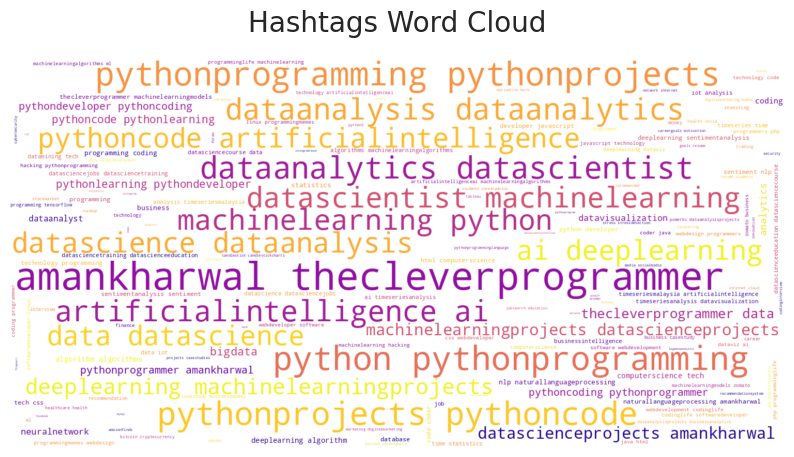

In [116]:
# Concatena todas as hashtags em uma única string, convertendo para string para evitar erros.
hashtags = ' '.join(data['Hashtags'].astype(str))

# Inicializa e gera uma nuvem de palavras com fundo branco e um mapa de cores 'plasma'.
wordcloud = WordCloud (
background_color='white', # Define o fundo branco
colormap='plasma',        # Escolhe a paleta de cores
width=1500,               # Largura da imagem
height=750                # Altura da imagem
).generate (hashtags)

# Cria uma figura matplotlib para exibir a nuvem de palavras.
plt.figure(figsize=(10, 6))

# Adiciona o título do gráfico com espaçamento.
plt.title('Hashtags Word Cloud', fontsize=20, pad=20) # 'pad' controla o espaçamento

# Exibe a nuvem de palavras.
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Remove os eixos para uma visualização mais limpa.
plt.show()

In [117]:
# Calculando a matriz de correlação apenas para colunas numéricas.
corr_matrix = data.select_dtypes(include=np.number).corr()

# Criando a matriz de calor (heatmap) com valores de correlação usando plotly.graph_objects.
fig = go.Figure(data=go.Heatmap(
z=corr_matrix.values,                  # Valores da correlação
x=corr_matrix.columns,                 # Nomes das colunas no eixo X
y=corr_matrix.index,                   # Nomes das Linhas no eixo y
colorscale='RdBu',                     # Escala de cores divergente (vermelho para azul)
zmin=-1,                               # Valor mínimo para a escala de cores (correlação perfeita negativa)
zmax=1,                                # Valor máximo para a escala de cores (correlação perfeita positiva)
text=np.round(corr_matrix.values, 2),  # Adicionando os valores de correlação arredondados como texto
texttemplate='%{text}',                # Formato do texto a ser exibido
hoverinfo='z'                          # Informação exibida ao passar o mouse (o valor da correlação)
))

# Atualizando o Layout do gráfico com título e rótulos dos eixos.
fig.update_layout(
    title='Correlation Matrix',
    xaxis_title='Features',
    yaxis_title='Features'
)

# Exibindo o gráfico.
fig.show()